<a href="https://colab.research.google.com/github/ArielFix/Intro2DL/blob/OnGoingAssignment1/Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 1. Music Century Classification

**Assignment Responsible**: Natalie Lang.

In this assignment, we will build models to predict which
**century** a piece of music was released.  We will be using the "YearPredictionMSD Data Set"
based on the Million Song Dataset. The data is available to download from the UCI 
Machine Learning Repository. Here are some links about the data:

- https://archive.ics.uci.edu/ml/datasets/yearpredictionmsd
- http://millionsongdataset.com/pages/tasks-demos/#yearrecognition

Note that you are note allowed to import additional packages **(especially not PyTorch)**. One of the objectives is to understand how the training procedure actually operates, before working with PyTorch's autograd engine which does it all for us.


## Question 1. Data (21%)

Start by setting up a Google Colab notebook in which to do your work.
Since you are working with a partner, you might find this link helpful:

- https://colab.research.google.com/github/googlecolab/colabtools/blob/master/notebooks/colab-github-demo.ipynb

The recommended way to work together is pair coding, where you and your partner are sitting together and writing code together. 

To process and read the data, we use the popular `pandas` package for data analysis.

In [1]:
import pandas
import numpy as np
import matplotlib.pyplot as plt

Now that your notebook is set up, we can load the data into the notebook. The code below provides
two ways of loading the data: directly from the internet, or through mounting Google Drive.
The first method is easier but slower, and the second method is a bit involved at first, but
can save you time later on. You will need to mount Google Drive for later assignments, so we recommend
figuring how to do that now.

Here are some resources to help you get started:

- http.://colab.research.google.com/notebooks/io.ipynb

In [2]:
load_from_drive = True

if not load_from_drive:
  csv_path = "http://archive.ics.uci.edu/ml/machine-learning-databases/00203/YearPredictionMSD.txt.zip"
else:
  from google.colab import drive
  drive.mount('/content/gdrive')
  csv_path = '/content/gdrive/My Drive/MSc/Courses/Into to Deep Learnig/Assignments/YearPredictionMSD.txt.zip' # TODO - UPDATE ME WITH THE TRUE PATH!

t_label = ["year"]
x_labels = ["var%d" % i for i in range(1, 91)]
df = pandas.read_csv(csv_path, names=t_label + x_labels)

Mounted at /content/gdrive


Now that the data is loaded to your Colab notebook, you should be able to display the Pandas
DataFrame `df` as a table:

In [3]:
df

,year,var1,var2,var3,var4,var5,var6,var7,var8,var9,...,var81,var82,var83,var84,var85,var86,var87,var88,var89,var90
0,2001,49.94357,21.47114,73.07750,8.74861,-17.40628,-13.09905,-25.01202,-12.23257,7.83089,...,13.01620,-54.40548,58.99367,15.37344,1.11144,-23.08793,68.40795,-1.82223,-27.46348,2.26327
1,2001,48.73215,18.42930,70.32679,12.94636,-10.32437,-24.83777,8.76630,-0.92019,18.76548,...,5.66812,-19.68073,33.04964,42.87836,-9.90378,-32.22788,70.49388,12.04941,58.43453,26.92061
2,2001,50.95714,31.85602,55.81851,13.41693,-6.57898,-18.54940,-3.27872,-2.35035,16.07017,...,3.03800,26.05866,-50.92779,10.93792,-0.07568,43.20130,-115.00698,-0.05859,39.67068,-0.66345
3,2001,48.24750,-1.89837,36.29772,2.58776,0.97170,-26.21683,5.05097,-10.34124,3.55005,...,34.57337,-171.70734,-16.96705,-46.67617,-12.51516,82.58061,-72.08993,9.90558,199.62971,18.85382
4,2001,50.97020,42.20998,67.09964,8.46791,-15.85279,-16.81409,-12.48207,-9.37636,12.63699,...,9.92661,-55.95724,64.92712,-17.72522,-1.49237,-7.50035,51.76631,7.88713,55.66926,28.74903
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515340,2006,51.28467,45.88068,22.19582,-5.53319,-3.61835,-16.36914,2.12652,5.18160,-8.66890,...,4.81440,-3.75991,-30.92584,26.33968,-5.03390,21.86037,-142.29410,3.42901,-41.14721,-15.46052
515341,2006,49.87870,37.93125,18.65987,-3.63581,-27.75665,-18.52988,7.76108,3.56109,-2.50351,...,32.38589,-32.75535,-61.05473,56.65182,15.29965,95.88193,-10.63242,12.96552,92.11633,10.88815
515342,2006,45.12852,12.65758,-38.72018,8.80882,-29.29985,-2.28706,-18.40424,-22.28726,-4.52429,...,-18.73598,-71.15954,-123.98443,121.26989,10.89629,34.62409,-248.61020,-6.07171,53.96319,-8.09364
515343,2006,44.16614,32.38368,-3.34971,-2.49165,-19.59278,-18.67098,8.78428,4.02039,-12.01230,...,67.16763,282.77624,-4.63677,144.00125,21.62652,-29.72432,71.47198,20.32240,14.83107,39.74909


To set up our data for classification, we'll use the "year" field to represent
whether a song was released in the 20-th century. In our case `df["year"]` will be 1 if
the year was released after 2000, and 0 otherwise.

In [4]:
df["year"] = df["year"].map(lambda x: int(x > 2000))

In [5]:
df.head(20)

,year,var1,var2,var3,var4,var5,var6,var7,var8,var9,...,var81,var82,var83,var84,var85,var86,var87,var88,var89,var90
0,1,49.94357,21.47114,73.07750,8.74861,-17.40628,-13.09905,-25.01202,-12.23257,7.83089,...,13.01620,-54.40548,58.99367,15.37344,1.11144,-23.08793,68.40795,-1.82223,-27.46348,2.26327
1,1,48.73215,18.42930,70.32679,12.94636,-10.32437,-24.83777,8.76630,-0.92019,18.76548,...,5.66812,-19.68073,33.04964,42.87836,-9.90378,-32.22788,70.49388,12.04941,58.43453,26.92061
2,1,50.95714,31.85602,55.81851,13.41693,-6.57898,-18.54940,-3.27872,-2.35035,16.07017,...,3.03800,26.05866,-50.92779,10.93792,-0.07568,43.20130,-115.00698,-0.05859,39.67068,-0.66345
3,1,48.24750,-1.89837,36.29772,2.58776,0.97170,-26.21683,5.05097,-10.34124,3.55005,...,34.57337,-171.70734,-16.96705,-46.67617,-12.51516,82.58061,-72.08993,9.90558,199.62971,18.85382
4,1,50.97020,42.20998,67.09964,8.46791,-15.85279,-16.81409,-12.48207,-9.37636,12.63699,...,9.92661,-55.95724,64.92712,-17.72522,-1.49237,-7.50035,51.76631,7.88713,55.66926,28.74903
5,1,50.54767,0.31568,92.35066,22.38696,-25.51870,-19.04928,20.67345,-5.19943,3.63566,...,6.59753,-50.69577,26.02574,18.94430,-0.33730,6.09352,35.18381,5.00283,-11.02257,0.02263
6,1,50.57546,33.17843,50.53517,11.55217,-27.24764,-8.78206,-12.04282,-9.53930,28.61811,...,11.63681,25.44182,134.62382,21.51982,8.17570,35.46251,11.57736,4.50056,-4.62739,1.40192
7,1,48.26892,8.97526,75.23158,24.04945,-16.02105,-14.09491,8.11871,-1.87566,7.46701,...,18.03989,-58.46192,-65.56438,46.99856,-4.09602,56.37650,-18.29975,-0.30633,3.98364,-3.72556
8,1,49.75468,33.99581,56.73846,2.89581,-2.92429,-26.44413,1.71392,-0.55644,22.08594,...,18.70812,5.20391,-27.75192,17.22100,-0.85210,-15.67150,-26.36257,5.48708,-9.13495,6.08680
9,1,45.17809,46.34234,-40.65357,-2.47909,1.21253,-0.65302,-6.95536,-12.20040,17.02512,...,-4.36742,-87.55285,-70.79677,76.57355,-7.71727,3.26926,-298.49845,11.49326,-89.21804,-15.09719


### Part (a) -- 7%

The data set description text asks us to respect the below train/test split to
avoid the "producer effect". That is, we want to make sure that no song from a single artist
ends up in both the training and test set.

Explain why it would be problematic to have
some songs from an artist in the training set, and other songs from the same artist in the
test set. (Hint: Remember that we want our test accuracy to predict how well the model
will perform in practice on a song it hasn't learned about.)

In [6]:
df_train = df[:463715]
df_test = df[463715:]

# convert to numpy
train_xs = df_train[x_labels].to_numpy()
train_ts = df_train[t_label].to_numpy()
test_xs = df_test[x_labels].to_numpy()
test_ts = df_test[t_label].to_numpy()

# Write your explanation here

# Songs from the same artist might have the same features due to the artist style.
# In order to test our model predictions for general data, test set must include data that wasn't in the train set, otherwise,
# we might have an overfit due to the producer effect and it will seem like good results on the test because the model overfitted to similar data.


### Part (b) -- 7%

It can be beneficial to **normalize** the columns, so that each column (feature)
has the *same* mean and standard deviation.

In [7]:
feature_means = df_train.mean()[1:].to_numpy() # the [1:] removes the mean of the "year" field
feature_stds  = df_train.std()[1:].to_numpy()

train_norm_xs = (train_xs - feature_means) / feature_stds
test_norm_xs = (test_xs - feature_means) / feature_stds

Notice how in our code, we normalized the test set using the *training data means and standard deviations*.
This is *not* a bug.

Explain why it would be improper to compute and use test set means
and standard deviations. (Hint: Remember what we want to use the test accuracy to measure.)

In [8]:
# Write your explanation here

# We will use our test to measure the model accuracy on new data (which might not be in a set/ batch) and will test it predictions according to the
# learned parameters during the training.
# during inference (predictions) we will use the mean and standard deviation of the train so in order for the test
# to represent the model accuracy during inference it should use the same parameters.


### Part (c) -- 7%

Finally, we'll move some of the data in our training set into a validation set.

Explain why we should limit how many times we use the test set, and that we should use the validation
set during the model building process.

In [9]:
# shuffle the training set
reindex = np.random.permutation(len(train_xs))
train_xs = train_xs[reindex]
train_norm_xs = train_norm_xs[reindex]
train_ts = train_ts[reindex]

# use the first 50000 elements of `train_xs` as the validation set
train_xs, val_xs           = train_xs[50000:], train_xs[:50000]
train_norm_xs, val_norm_xs = train_norm_xs[50000:], train_norm_xs[:50000]
train_ts, val_ts           = train_ts[50000:], train_ts[:50000]

# Write your explanation here

# in order for the test set to represent how well the model will perform on new data' we should be sure that we test it with a new data which wasn't a part
# of the training considerations, hence, the test set should be used only once at the end of the process to verify the model accuracy.
# due to the need of hyper parameters tunung and feature engineering during the model training process in order to get the best model,
# we are splitting our train set to train and validation.
# The validation set will be used as a test set for determining the hyper parameters and test set will be used for testing our final trained model when hyper parameters and
# features are final


## Part 2. Classification (79%)

We will first build a *classification* model to perform decade classification.
These helper functions are written for you. All other code that you write in this section should be vectorized whenever possible (i.e., avoid unnecessary loops).

In [251]:
def sigmoid(z):
  return 1 / (1 + np.exp(-z))
    
def cross_entropy(t, y):
  return -t.reshape(-1,) * np.log(y.reshape(-1,)) - (1 - t.reshape(-1,)) * np.log(1 - y.reshape(-1,))

def cost(y, t):
  return np.mean(cross_entropy(t, y))

def get_accuracy(y, t):
  acc = 0
  N = 0
  for i in range(len(y)):
    N += 1
    if (y[i] >= 0.5 and t[i] == 1) or (y[i] < 0.5 and t[i] == 0):
      acc += 1
  return acc / N

### Part (a) -- 7%

Write a function `pred` that computes the prediction `y` based on logistic regression, i.e., a single layer with weights `w` and bias `b`. The output is given by: 
\begin{equation}
y = \sigma({\bf w}^T {\bf x} + b),
\end{equation}
where the value of $y$ is an estimate of the probability that the song is released in the current century, namely ${\rm year} =1$.

In [252]:
def pred(w, b, X):
  """
  Returns the prediction `y` of the target based on the weights `w` and scalar bias `b`.

  Preconditions: np.shape(w) == (90,)
                 type(b) == float
                 np.shape(X) = (N, 90) for some N

  >>> pred(np.zeros(90), 1, np.ones([2, 90]))
  array([0.73105858, 0.73105858]) # It's okay if your output differs in the last decimals
  """
  # Your code goes here 

  return np.clip(sigmoid(np.dot(X, w) + b), np.finfo(float).eps, 1 - np.finfo(float).eps)


### Part (b) -- 7%

Write a function `derivative_cost` that computes and returns the gradients 
$\frac{\partial\mathcal{L}}{\partial {\bf w}}$ and
$\frac{\partial\mathcal{L}}{\partial b}$. Here, `X` is the input, `y` is the prediction, and `t` is the true label.




In [253]:
def derivative_cost(X, y, t):
  """
  Returns a tuple containing the gradients dLdw and dLdb.

  Precondition: np.shape(X) == (N, 90) for some N
                np.shape(y) == (N,)
                np.shape(t) == (N,)

  Postcondition: np.shape(dLdw) = (90,)
           type(dLdb) = float
  """
  # Your code goes here
  
  dldy = y.reshape(-1,)-t.reshape(-1,)
  dLdw = np.dot(X.T, dldy) / X.shape[0]
  dLdb = np.mean(dldy)
  return (dLdw, dLdb)


# **Explenation on Gradients**




**Add here an explaination on how the gradients are computed**:

---
##**Gradient Computation for w and b:**  
####**First we will define our functions:**  
**Loss:** $\,\,\,L(CE) = \frac{1}{N}\sum_{n=1}^{N}Cross Entropy_{n} $
\
**CrossEntropy:** $\,\,\,CE(y, t) = -\overbrace{t}^{Label} * \ln({σ}) - (1-t)*\ln({1-σ})$\
\
**Sigmoid:** $\,\,\, σ(z) = \frac{1}{1 + \exp^{-z}}$\
\
**z:**$\,\,\,z(x, w, b) = wx +b$

\
Our loss function **_L_** derivative is:
$$\frac{\partial L}{\partial w} = \frac{1}{N}\sum_{n=1}^{N}(\frac{\partial CE_{n}}{\partial w})$$
\
From now on we will focus on CE derivatives, we will apply those derivitives on our loss finction at the end:

$$ \frac{\partial CE}{\partial w}= \frac{\partial CE}{\partial σ}*\frac{\partial σ}{\partial z}*\frac{\partial z}{\partial w}$$
\
$$\frac{\partial CE}{\partial b}= \frac{\partial CE}{\partial σ}*\frac{\partial σ}{\partial z}*\frac{\partial z}{\partial b}$$

\
According to the equations on top we should look at each function partial derivative in order to calculate the Gradien Decent: 

We will start with $\frac{\partial CE}{\partial σ}:$  

$$\frac{\partial CE}{\partial σ} = \frac{\partial}{\partial σ}[-{t} * \ln({σ}) - (1-t)*\ln({1-σ})]
\\
= \frac{\partial}{\partial σ}[-{t} * \ln({σ})] - \frac{\partial}{\partial σ}[(1-t)*\ln({1-σ})]
\\
 = -\frac{t}{y} - (-\frac{1-t}{1-y})
 \\ -\frac{t}{y} +\frac{1-t}{1-y}$$

\
 Now we will calculate $\frac{\partial σ}{\partial z}$:  
 $$\frac{\partial σ}{\partial z} = \frac{\partial}{\partial z}[\frac{1}{1 + \exp^{-z}}] 
 \\= -(\frac{-\exp^{-z}}{(1 + \exp^{-z})^{2}}) 
 \\= \frac{\exp^{-z}}{(1 + \exp^{-z})^{2}}$$
 \\
 \\
We can see that:  
$$ σ(z) = \frac{1}{1 + \exp^{-z}}
\\
 1 + \exp^{-z} = \frac{1}{σ}
\\
\exp^{-z} = \frac{1}{σ} - 1$$

\
hence: $$\frac{\partial σ}{\partial z} = \frac{\exp^{-z}}{(1 + \exp^{-z})^{2}} 
\\= σ^{2}*(\frac{1}{σ} - 1) \,,\,\,\,\forall\,\,\, σ \ne 0
\\= σ*(1-σ)$$  
Now we will look on $\frac{\partial z}{\partial w}$ and $\frac{\partial z}{\partial b}$:  
$$$\frac{\partial z}{\partial w} = \frac{\partial}{\partial w}(w*x + b) = x
\\ \frac{\partial z}{\partial b} = \frac{\partial}{\partial b}(w*x + b) = 1 $$

\
Now we will use our calculated derivtives:
$$\frac{\partial CE}{\partial w} = (-\frac{t}{σ} +\frac{1-t}{1-σ})*σ*(1-σ)*x
\\ =  (\frac{-t*σ*(1-σ)}{σ} +\frac{σ*(1-σ)(1-t)}{1-σ})*x
\\ =(-t*(1-σ) + σ*(1-t))*x 
\\ = (-t + t*σ +σ - t*σ)*x
\\ = (σ - t)*x$$
\
and accorfong to the calculation above:  
$$\frac{\partial CE}{\partial b} =(σ - t)*1$$
\
applying on our loss function:  
$$\frac{\partial L}{\partial w} = \frac{1}{N}\sum_{n=1}^{N}((σ_{n} - t_{n})*x_{n})$$ 
$$\frac{\partial L}{\partial b} = \frac{1}{N}\sum_{n=1}^{N}(σ_{n} - t_{n})$$




### Part (c) -- 7%

We can check that our derivative is implemented correctly using the finite difference rule. In 1D, the
finite difference rule tells us that for small $h$, we should have

$$\frac{f(x+h) - f(x)}{h} \approx f'(x)$$

Show that $\frac{\partial\mathcal{L}}{\partial b}$  is implement correctly
by comparing the result from `derivative_cost` with the empirical cost derivative computed using the above numerical approximation.


In [254]:
# Your code goes here

h = 1e-09

t = np.zeros(2,)
X = np.ones([2, 90])
w = np.random.normal(0,1, size=(90,))

b = 1
y = pred(w, b, X)
y_b_plus = pred(w, b + h, X)

cost_y = cost(y, t)
cost_y_b_plus = cost(y_b_plus, t)

r1 = (cost_y_b_plus - cost_y) / h
r2 = derivative_cost(X, y, t)[1]
print("The analytical results is: ", r1)
print("The algorithm results is: ", r2)
print("Gradient difference for w1 (analytical-algorithm): ", r1-r2)


The analytical results is:  0.9905418707489843
The algorithm results is:  0.9905358728437538
Gradient difference for w1 (analytical-algorithm):  5.997905230481493e-06


### Part (d) -- 7%

Show that $\frac{\partial\mathcal{L}}{\partial {\bf w}}$  is implement correctly.

In [255]:
# Your code goes here. You might find this below code helpful: but it's
# up to you to figure out how/why, and how to modify the code

h = 2e-7
w = np.random.normal(0,0.001, size=(90,))
t = train_ts[:100]
X = train_norm_xs[:100]
# X = np.random.normal(size=(100,90))
# t = np.random.randint(0,2, size=(100,))

b = np.random.randn(1,)[0]

y = pred(w, b, X)
cost_y = cost(y,t)

cost_y_w = np.zeros(90)
cost_y_w_plus = np.zeros(90)
for i in range(0, len(w)):
  w_plus = w.copy()
  w_plus[i] = w_plus[i] + h
  y2_w_plus = pred(w_plus, b, X)
  cost_y_w[i] = cost_y
  cost_y_w_plus[i] = cost(y2_w_plus, t)
  
r1 = (cost_y_w_plus - cost_y_w) / h
r2 = derivative_cost(X, y, t)[0]

print("The analytical results is:", r1)
print("The algorithm results is: ", r2)
print("Gradient difference for w2 (analytical-algorithm): ", r1-r2)
print("max difference between calculations:", np.max(np.abs(r1-r2)))
print("mean difference between calculations: ", np.mean(np.abs(r1-r2)))
print("median difference between calculations: ", np.median(np.abs(r1-r2)))


The analytical results is: [-0.22388647 -0.01969989  0.08948836  0.02512387 -0.10292465  0.04864946
 -0.14800423  0.05594818  0.03873626  0.01353366  0.13299505  0.17805237
  0.01707888 -0.03108078  0.06667067 -0.04639905  0.06282323 -0.03968031
  0.0123931  -0.0774606   0.10316766 -0.02339606 -0.07326102  0.0480992
 -0.1461892  -0.01545643  0.10002768  0.07857709 -0.04989228 -0.07594461
  0.06543522  0.02495945  0.17704644 -0.02694927  0.09845726  0.13535368
  0.03957472  0.04952553 -0.01505996  0.1066219   0.04937904  0.00893523
 -0.052136   -0.05475787  0.00359926  0.140287    0.00855804  0.08669665
  0.0910283   0.03944684 -0.00094698  0.09929946 -0.14108268  0.1230266
 -0.00199537 -0.05798736  0.0801121   0.05875209  0.20603312  0.04559272
  0.01382835  0.00819043  0.1963284  -0.08156786 -0.05586496  0.09021097
  0.05243163 -0.00938364  0.05372842 -0.01750109  0.01465789  0.04738224
 -0.00974761 -0.11687966 -0.04741379  0.00721593 -0.00556152  0.03182399
  0.06384725 -0.07917093  

### Part (e) -- 7%

Now that you have a gradient function that works, we can actually run gradient descent. 
Complete the following code that will run stochastic: gradient descent training:

In [256]:
def run_gradient_descent(train_norm_xs, train_ts, val_norm_xs, val_ts, w0, b0, mu=0.1, batch_size=100, max_iters=100):
  """Return the values of (w, b) after running gradient descent for max_iters.
  We use:
    - train_norm_xs and train_ts as the training set
    - val_norm_xs and val_ts as the test set
    - mu as the learning rate
    - (w0, b0) as the initial values of (w, b)

  Precondition: np.shape(w0) == (90,)
                type(b0) == float
 
  Postcondition: np.shape(w) == (90,)
                 type(b) == float
  """
  w = w0.copy()
  b = b0.copy()
  iter = 0
  history = {}
  val_cost_history = []
  val_acc_history = []

  while iter < max_iters:
    # shuffle the training set (there is code above for how to do this)
    reindex = np.random.permutation(len(train_norm_xs))
    train_norm_xs = train_norm_xs[reindex]
    train_ts = train_ts[reindex]

    for i in range(0, len(train_norm_xs), batch_size): # iterate over each minibatch
      # minibatch that we are working with:
      X = train_norm_xs[i:(i + batch_size)]
      t = train_ts[i:(i + batch_size), 0]

      # since len(train_norm_xs) does not divide batch_size evenly, we will skip over
      # the "last" minibatch
      if np.shape(X)[0] != batch_size:
        continue

      # compute the prediction
      prediction = pred(w, b, X)

      # update w and b
      dLdw, dLdb = derivative_cost(X, prediction, t)
      w -= dLdw*mu
      b -= dLdb*mu

      # increment the iteration count
    iter += 1
      # compute and print the *validation* loss and accuracy
    if (iter % 10 == 0):
      val_cost = 0
      val_acc = 0
      count = 0
      for i in range(0, len(val_norm_xs), batch_size): # iterate over each minibatch
        # minibatch that we are working with:
        X = val_norm_xs[i:(i + batch_size)]
        t = val_ts[i:(i + batch_size), 0]

        val_prediction = pred(w, b, X)
        val_cost += cost(val_prediction, t)
        val_acc += get_accuracy(val_prediction, t)
        count += 1

      val_cost /= count
      val_acc /= count
      print("Iter %d. [Val Acc %.0f%%, Loss %f]" % (
              iter, val_acc * 100, val_cost))
      val_cost_history.append(val_cost)
      val_acc_history.append(val_acc)

      if iter >= max_iters:
        break

      # Think what parameters you should return for further use
  history["val_cost"] = val_cost_history
  history["val_acc"] = val_acc_history
  history["learning_rate"] = mu
  history["batch_size"] = batch_size

  return history, (w, b)



### Part (f) -- 7%

Call `run_gradient_descent` with the weights and biases all initialized to zero.
Show that if the learning rate $\mu$ is too small, then convergence is slow.
Also, show that if $\mu$ is too large, then the optimization algorirthm does not converge. The demonstration should be made using plots showing these effects.

In [257]:
# w0 = np.random.randn(90)
w0 = np.random.normal(0, 0.001, size=(90))

b0 = np.random.randn(1)[0]

# Write your code here
print("Small mu: ")
small_mu_history, parameters_small = run_gradient_descent(train_norm_xs, train_ts, val_norm_xs, val_ts, w0, b0, mu=3e-6, batch_size=100, max_iters=200)
print("\n\n", '='*200, "\n\nLarge mu: ")
large_mu_history, parameters_large = run_gradient_descent(train_norm_xs, train_ts, val_norm_xs, val_ts, w0, b0, mu=5, batch_size=100, max_iters=200)


Small mu: 
Iter 10. [Val Acc 56%, Loss 1.074102]
Iter 20. [Val Acc 56%, Loss 1.051735]
Iter 30. [Val Acc 56%, Loss 1.030304]
Iter 40. [Val Acc 56%, Loss 1.009795]
Iter 50. [Val Acc 56%, Loss 0.990190]
Iter 60. [Val Acc 56%, Loss 0.971460]
Iter 70. [Val Acc 56%, Loss 0.953572]
Iter 80. [Val Acc 56%, Loss 0.936493]
Iter 90. [Val Acc 56%, Loss 0.920186]
Iter 100. [Val Acc 56%, Loss 0.904617]
Iter 110. [Val Acc 56%, Loss 0.889751]
Iter 120. [Val Acc 56%, Loss 0.875556]
Iter 130. [Val Acc 56%, Loss 0.862002]
Iter 140. [Val Acc 56%, Loss 0.849060]
Iter 150. [Val Acc 56%, Loss 0.836703]
Iter 160. [Val Acc 56%, Loss 0.824905]
Iter 170. [Val Acc 56%, Loss 0.813642]
Iter 180. [Val Acc 56%, Loss 0.802891]
Iter 190. [Val Acc 56%, Loss 0.792629]
Iter 200. [Val Acc 57%, Loss 0.782835]



Large mu: 
Iter 10. [Val Acc 64%, Loss 2.177784]
Iter 20. [Val Acc 64%, Loss 2.010463]
Iter 30. [Val Acc 64%, Loss 1.866529]
Iter 40. [Val Acc 66%, Loss 1.385670]
Iter 50. [Val Acc 66%, Loss 1.637965]
Iter 60. [Val 

In [258]:
%matplotlib inline
def plot_acc_loss(acc_history, loss_history, iteration_resolution, lr, batch_size):
  """Plot the values of validation accuracy and loss from model train history lists.
  We use:
    - acc_historys as the accuracy history list
    - loss_history as the loss history list
    - iteration_resolution as the values iterations resolution
    - lr is the learning rate used for traunung
    - batch_size is the batch size used for training

  Precondition: type(acc_history) == list(flaot)
 
  Postcondition: type(loss_history) == list(flaot)
  """
  iterations = range(iteration_resolution, len(acc_history)*iteration_resolution + iteration_resolution, 10)
  
  plt.figure(figsize=[32,6])
  plt.subplot(1,2,1)
  plt.plot(iterations[:], acc_history[:], "b-")
  plt.title("Model Accuracy,  learning rate - {}, batch size = {}".format(lr, batch_size))
  plt.xlabel("iteration", fontsize=14)
  plt.ylabel("Validation Accuracy", rotation=90, fontsize=14)
  ax1 = plt.gca()
  ax1.set(ylim=(0, 1))
  plt.grid()
  plt.show()

  plt.figure(figsize=[32,6])
  plt.subplot(1,2,2)
  plt.plot(iterations[:], loss_history[:], "r-")
  plt.title("Model Accuracy,  learning rate - {}, batch size = {}".format(lr, batch_size))
  plt.xlabel("iteration", fontsize=14)
  plt.ylabel("Validation Loss", rotation=90, fontsize=14)
  ax2 = plt.gca()
  ax2.set(ylim=(0, max(loss_history) +1))
  plt.grid()
  plt.show()


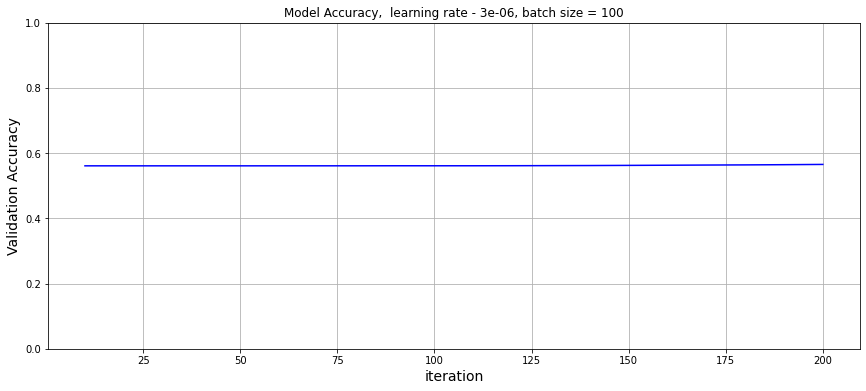

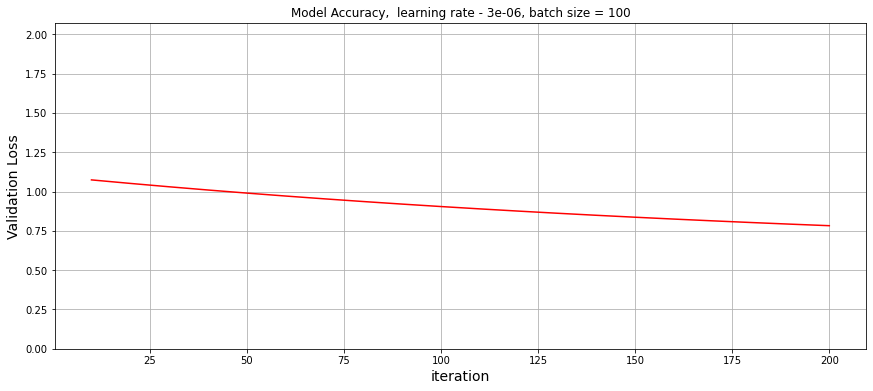

In [259]:
plot_acc_loss(small_mu_history["val_acc"], small_mu_history["val_cost"], 10, small_mu_history["learning_rate"], small_mu_history["batch_size"])

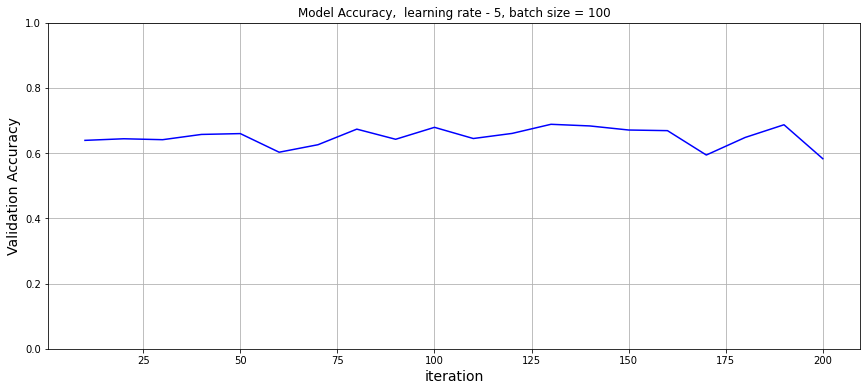

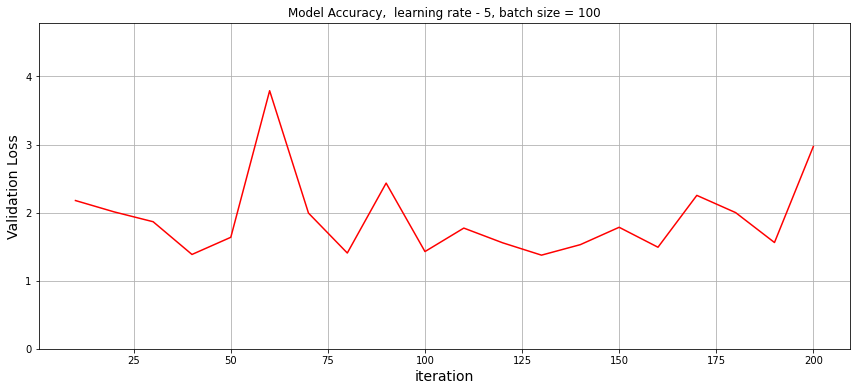

In [260]:
plot_acc_loss(large_mu_history["val_acc"], large_mu_history["val_cost"], 10, large_mu_history["learning_rate"], large_mu_history["batch_size"])


**Explain and discuss your results here:**

Our cost/ loss function is a positive parabola, whiel the leaning rate denotes 
the step for correction over each parameter in (w, b).  

While we are using too small learning rate we will converge slowly which cuse the loss function to decrease very slow and the accuracy ro increase slowly either.  
We can notice the small learning rate in the first plot while the loss decreasing too slow and the accuracy is increasing slowly either, which means the model converges toward loss function minima in very small steps.  

While we are using too large learning rate we won't be able to converge because we will skip over the loss function minima back and forth with too large steps.
We can notice the large learning rate in the second plot while both, loss and accuracy are jiterring around some value,thats means the the model's parameters are changing but due to the large learning rate the change cause a skip over the minima back and forth on each step. 

### Part (g) -- 7%

Find the optimial value of ${\bf w}$ and $b$ using your code. Explain how you chose
the learning rate $\mu$ and the batch size. Show plots demostrating good and bad behaviours.

In [350]:

def get_search_params():
  batch_size_list = [100, 500]
  learning_rate_list = [1e-4, 4e-5]

  return batch_size_list, learning_rate_list

def get_best_model(train_norm_xs, train_ts, val_norm_xs, val_ts, w0, b0):
  # w0 = np.random.randn(90)
  # b0 = np.random.randn(1)[0] 
  batch_sizes , learning_rates = get_search_params()
  best_model = {}
  current_model = {}
  all_models = {}
  best_val_acc = 0
  count = 0
  for learning_rate in learning_rates:
    for  batch_size in batch_sizes:
      temp_model_history, parameters = run_gradient_descent(train_norm_xs, train_ts, val_norm_xs, val_ts, w0, b0, mu=learning_rate, batch_size=batch_size, max_iters=200)
      acc = temp_model_history["val_acc"][-1]
      loss = temp_model_history["val_cost"][-1]
      print("finished training model with: learning rate = {:f}, batch size = {:.0f}, val accuracy = {:.2f} %, val loss = {:f}".format(
              learning_rate, batch_size, (acc * 100), loss))
      v = "{}".format(count)
      current_model["history"] = temp_model_history
      current_model["parameters"] = parameters_large
      current_model["learning_rate"] = learning_rate
      current_model["batch_size"] = batch_size
      all_models[v] = current_model
      count +=1
      if temp_model_history["val_acc"][-1] > best_val_acc:
        best_val_acc = temp_model_history["val_acc"][-1]
        best_model["history"] = temp_model_history
        best_model["parameters"] = parameters_large
        best_model["learning_rate"] = learning_rate
        best_model["batch_size"] = batch_size

  print("best model found with learning rate = {}, and batch size = {}".format(best_model["learning_rate"], best_model["batch_size"]))
  return best_model, all_models

# Write your code here


In [ ]:
w0 = np.random.normal(0, 0.01, size=(90))
b0 = np.random.randn(1)[0]

best_model, all_models = get_best_model(train_norm_xs, train_ts, val_norm_xs, val_ts, w0, b0)

Iter 10. [Val Acc 57%, Loss 0.671258]
Iter 20. [Val Acc 71%, Loss 0.596203]


In [ ]:
best_model_history = best_model["history"]
plot_acc_loss(best_model_history["val_acc"], best_model_history["val_cost"], 10, best_model_history["learning_rate"], best_model_history["batch_size"])

**Explain and discuss your results here:**




### Part (h) -- 15%

Using the values of `w` and `b` from part (g), compute your training accuracy, validation accuracy,
and test accuracy. Are there any differences between those three values? If so, why?

In [ ]:
# Write your code here
w, b = best_model['parameters']

train_acc = get_accuracy(pred(w, b, train_norm_xs), train_ts)
val_acc = get_accuracy(pred(w, b, val_norm_xs), val_ts)
test_acc = get_accuracy(pred(w, b, test_norm_xs), test_ts)

print('train_acc = ', train_acc, ' val_acc = ', val_acc, ' test_acc = ', test_acc)


**Explain and discuss your results here:**


### Part (i) -- 15%

Writing a classifier like this is instructive, and helps you understand what happens when
we train a model. However, in practice, we rarely write model building and training code
from scratch. Instead, we typically use one of the well-tested libraries available in a package.

Use `sklearn.linear_model.LogisticRegression` to build a linear classifier, and make predictions about the test set. Start by reading the
[API documentation here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html).

Compute the training, validation and test accuracy of this model.

In [ ]:
import sklearn.linear_model

model = sklearn.linear_model.LogisticRegression()
model.fit(train_xs, train_ts)

train_acc = get_accuracy(model.predict(train_xs), train_ts)
val_acc = get_accuracy(model.predict(val_xs), val_ts)
test_acc = get_accuracy(model.predict(test_xs), test_ts)

print('train_acc = ', train_acc, ' val_acc = ', val_acc, ' test_acc = ', test_acc)

**This parts helps by checking if the code worked.**
**Check if you get similar results, if not repair your code**
